## <center>DBSCAN Project</center>  



#### The Data

Attribute Information:

1. FRESH: annual spending (m.u.) on fresh products (Continuous);
2. MILK: annual spending (m.u.) on milk products (Continuous);
3. GROCERY: annual spending (m.u.)on grocery products (Continuous);
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7. CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8. REGION: customers  Region Lisnon, Oporto or Other (Nominal)



**COMPLETE THE TASKS IN BOLD**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Python/Machine Learning/Unsupervised Learning/DBSCAN/Data Sets/wholesome_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

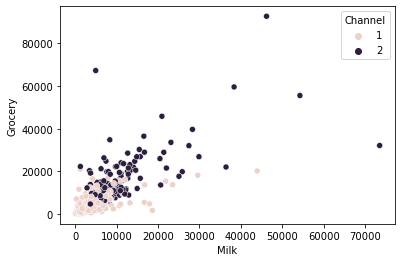

In [4]:
sns.scatterplot(data=df, x="Milk", y="Grocery", hue="Channel")

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel.**

<AxesSubplot:xlabel='Milk', ylabel='Count'>

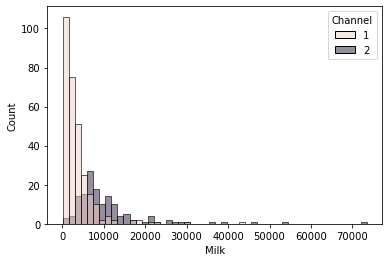

In [5]:
sns.histplot(data=df, x="Milk", hue="Channel")

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

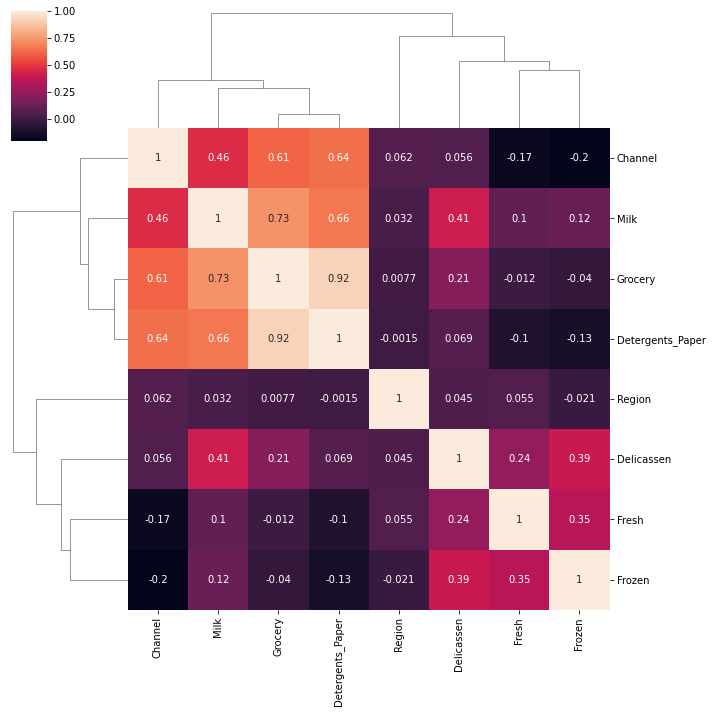

In [6]:
sns.clustermap(data=df.corr(), annot=True);

**TASK: Create a PairPlot of the dataframe, colored by Region.**

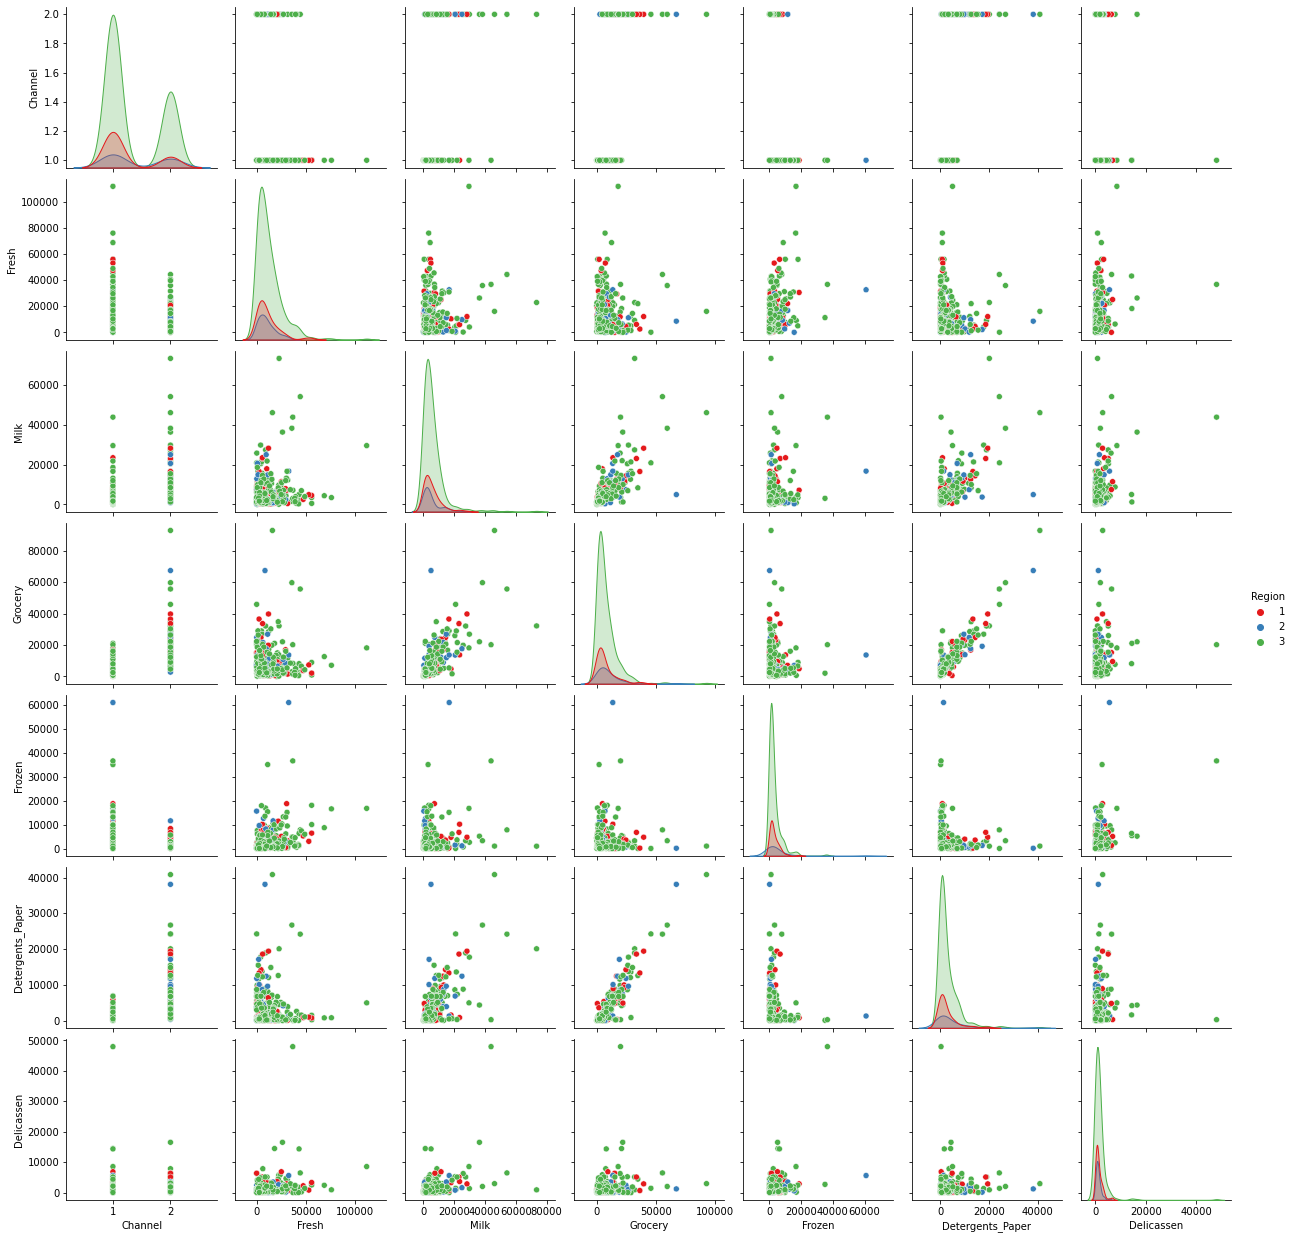

In [7]:
sns.pairplot(data=df, hue="Region", palette="Set1");

### DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

In [9]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

df1 = pd.DataFrame(data=data, columns=df.columns)

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [10]:
outlier_percent = []
number_of_outliers = []
x_vals = np.linspace(0.001,3,100)
min_samples = 2*df1.shape[1]

for eps in x_vals:
    
    # Create Model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    vals = dbscan.fit_predict(df1)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(vals == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(vals == -1) / len(vals)
    
    outlier_percent.append(perc_outliers)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

Text(0, 0.5, 'Percentage of points classified as outliers')

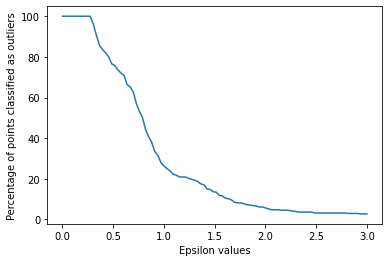

In [11]:
plt.plot(x_vals, outlier_percent)
plt.xlabel("Epsilon values")
plt.ylabel("Percentage of points classified as outliers")

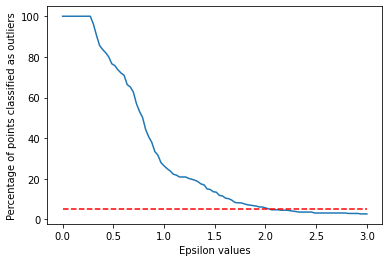

In [12]:
plt.plot(x_vals, outlier_percent)
plt.xlabel("Epsilon values")
plt.ylabel("Percentage of points classified as outliers")
plt.hlines(y=5,xmin=0,xmax=3,colors='red',ls='--') # Taking a 5% of points as outliers, the obtained epsilon value is 2

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value.**

In [13]:
dbscan = DBSCAN(eps=2, min_samples=min_samples)
vals = dbscan.fit_predict(df1)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

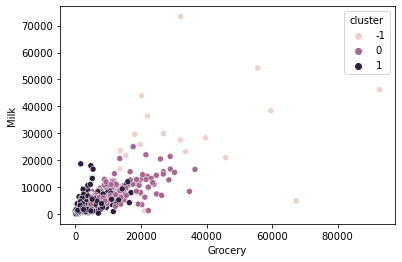

In [14]:
df["cluster"] = vals
sns.scatterplot(data=df, x="Grocery", y="Milk", hue="cluster")

**TASK: Create a similar scatterplot now with Milk vs. Detergents Paper.**

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

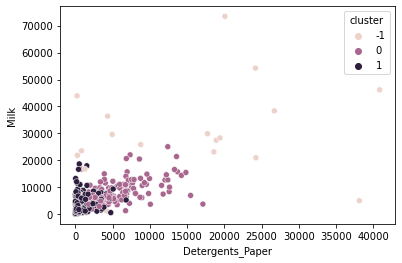

In [15]:
sns.scatterplot(data=df, x="Detergents_Paper", y="Milk", hue="cluster")

**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [16]:
cats = df.drop(columns=["Channel", "Region"])

cat_means = cats.groupby(by="cluster").mean()
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

In [17]:
scaler_min_max = MinMaxScaler()
scaled_vals = scaler_min_max.fit_transform(cat_means)

df2 = pd.DataFrame(data=scaled_vals, columns=cat_means.columns, index=cat_means.index)
df2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


<AxesSubplot:ylabel='cluster'>

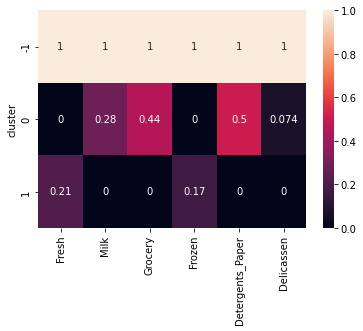

In [18]:
sns.heatmap(data=df2, annot=True)

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

<AxesSubplot:ylabel='cluster'>

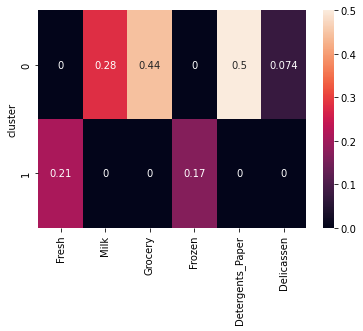

In [19]:
df3 = df2.drop(index=-1)
sns.heatmap(data=df3, annot=True)

**TASK: What spending category were the two clusters more different in?**

We can see that Detergents Paper was the most significant difference, followed by the Grocery. On the other hand Delicassen clusters were the most homogeneous.

Also worth noting, Fresh and Frozen were the only 2 categories with more prevelance in cluster 1, the rest in cluster 0.